In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from rwr_functions import *
from constants import *
import seaborn as sns
import matplotlib.pyplot as plt



from networkx import pagerank, from_pandas_edgelist

In [2]:
results = []
results_ratio = []
# metrics = 0
for netname in NETWORKS:
    graph = load_graph_nx(netname)
    
    
    for disease in tqdm(DISEASES):
        pegasus_data = load_pegasus_results(disease)
        pagerank_seeds = init_rwr_scores_nx(graph, pegasus_data)
        gene_seeds_ncbi, ncbi_targets = load_seeds_and_targets(disease)
        
        ncbi_targets = list(set(ncbi_targets))
        for alpha in tqdm(ALPHAS):
            rwr_scores = perform_rwr_nx(alpha, graph, pagerank_seeds)
            rwr_results = process_rwr_results_nx(rwr_scores, graph, pegasus_data, pagerank_seeds) 
            
            rwr_results_ratio = rwr_results.copy()
            rwr_results_ratio["Ratio"] = rwr_results_ratio["Final Score"]/np.maximum(rwr_results_ratio["Initial Score"], 0.01)
            rwr_results_ratio = rwr_results_ratio.sort_values(by="Ratio", ascending=False)
            
            for K in Ks:
                metrics = calculate_metrics(rwr_results, K, gene_seeds_ncbi, ncbi_targets, netname, alpha, disease)
                results.append(metrics)
                
                metrics_ratio = calculate_metrics(rwr_results_ratio, K, gene_seeds_ncbi, ncbi_targets, netname, alpha, disease)
                results_ratio.append(metrics_ratio)
                
results_ratio = pd.concat(results_ratio)
results = pd.concat(results)
results

Loading BioPlex3 graph


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loading HumanNet graph


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loading PCNet graph


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loading ProteomeHD graph


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loading STRING graph


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

,Network,Alpha,Metric,K,Value,Method,Disease
0,BioPlex3,0.0,Average Precision,20,0.557018,Score,asthma
0,BioPlex3,0.0,Average Precision,50,0.476506,Score,asthma
0,BioPlex3,0.0,Average Precision,100,0.358670,Score,asthma
0,BioPlex3,0.0,Average Precision,20,0.175181,Score,autism
0,BioPlex3,0.0,Average Precision,50,0.185409,Score,autism
0,BioPlex3,0.0,Average Precision,100,0.197685,Score,autism
0,BioPlex3,0.0,Average Precision,20,0.543678,Score,schizophrenia
0,BioPlex3,0.0,Average Precision,50,0.493509,Score,schizophrenia
0,BioPlex3,0.0,Average Precision,100,0.458795,Score,schizophrenia
0,HumanNet,0.0,Average Precision,20,0.664748,Score,asthma


In [3]:
# results.to_csv("outputs/gene_scores_single_net_metrics_no_prop.csv", index=False)

In [17]:
results.to_csv("outputs/gene_scores_single_net_metrics.csv", index=False)

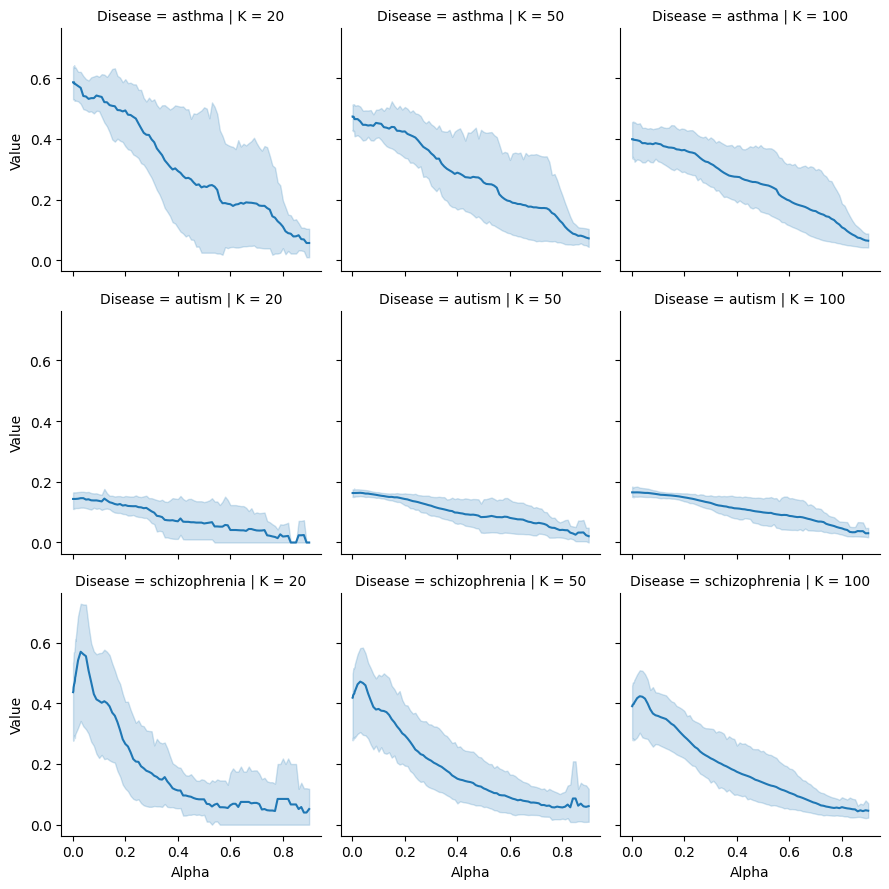

In [13]:
df = results[results["Metric"]=="Average Precision"]

g = sns.FacetGrid(df, col="K",  row="Disease", hue="Metric")
g.map(sns.lineplot, "Alpha", "Value")

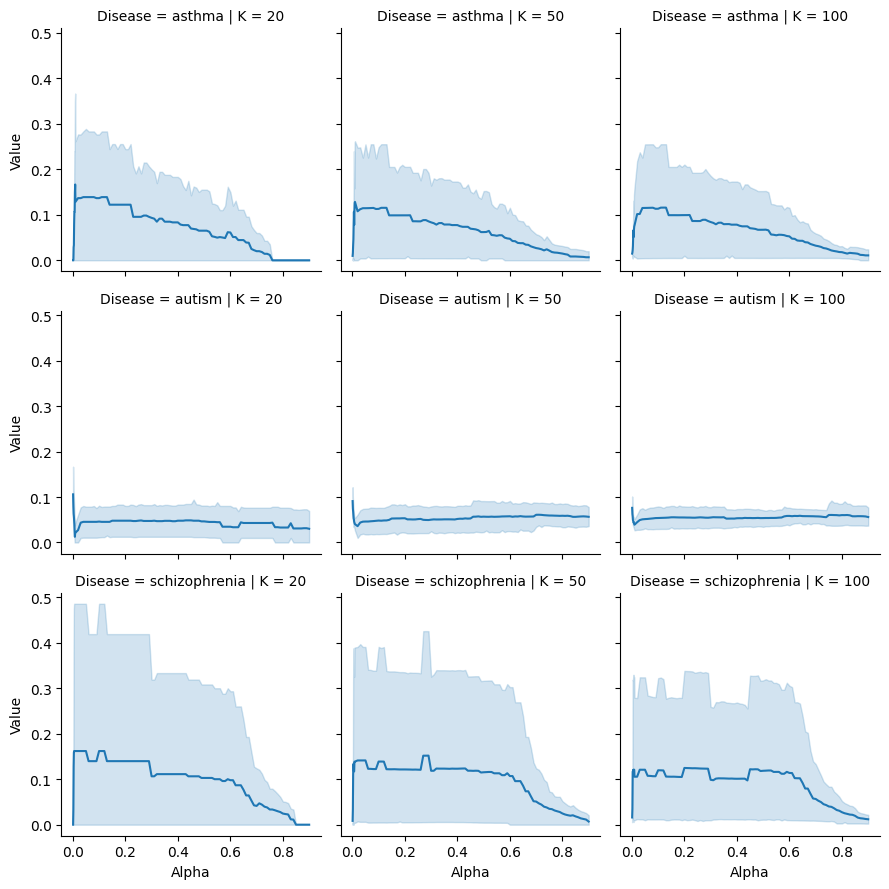

In [16]:
g = sns.FacetGrid(results_ratio, col="K",  row="Disease", hue="Metric")
g.map(sns.lineplot, "Alpha", "Value")

In [18]:
results_ratio.to_csv("outputs/gene_scores_results_ratio.csv", index=False)

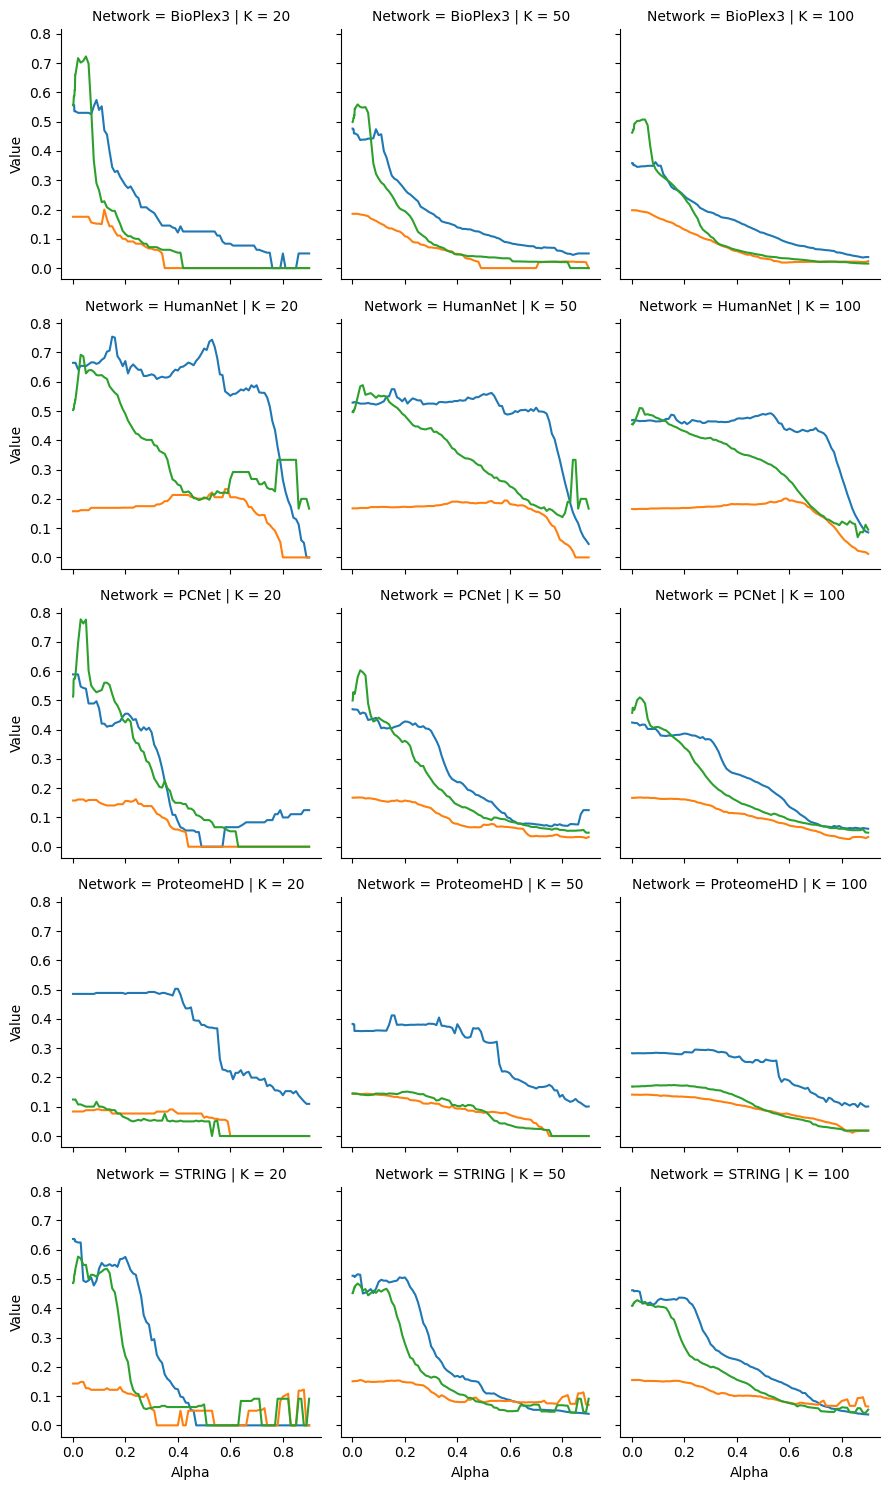

In [15]:
g = sns.FacetGrid(df, col="K",  row="Network", hue="Disease")
g.map(sns.lineplot, "Alpha", "Value")

In [ ]:
np.linspace(0.01, 0.30, 30)

In [ ]:
len(np.concatenate((np.linspace(0.001, 0.01, 10), np.linspace(0.01, 0.30, 30), np.linspace(0.3, 0.95, 14))))

In [ ]:
g = sns.FacetGrid(df, col="K",  row="Network")
g.map(sns.lineplot, "Alpha", "Value")

In [6]:
rwr_results_ratio = rwr_results.copy()
rwr_results_ratio

,Idx,Gene NCBI ID,Symbol,Initial Score,Final Score
2694,2694,26232,FBXO2,0.010427,0.003439
1622,1622,3312,HSPA8,0.013549,0.003178
1694,1694,3309,HSPA5,0.460071,0.002927
7877,7877,10155,TRIM28,0.442198,0.002475
5781,5781,11318,GPR182,1.153303,0.002374
...,...,...,...,...,...
7949,7949,83743,GRWD1,0.026131,0.000005
1937,1937,29102,RNASEN,0.027479,0.000005
3211,3211,22994,-,0.000000,0.000005
1146,1146,441502,-,0.000000,0.000004


In [7]:
rwr_results_ratio["Ratio"] = rwr_results_ratio["Final Score"]/np.maximum(rwr_results_ratio["Initial Score"], 0.01)
rwr_results_ratio

,Idx,Gene NCBI ID,Symbol,Initial Score,Final Score,Ratio
2694,2694,26232,FBXO2,0.010427,0.003439,0.329848
1622,1622,3312,HSPA8,0.013549,0.003178,0.234548
1694,1694,3309,HSPA5,0.460071,0.002927,0.006363
7877,7877,10155,TRIM28,0.442198,0.002475,0.005598
5781,5781,11318,GPR182,1.153303,0.002374,0.002058
...,...,...,...,...,...,...
7949,7949,83743,GRWD1,0.026131,0.000005,0.000197
1937,1937,29102,RNASEN,0.027479,0.000005,0.000180
3211,3211,22994,-,0.000000,0.000005,0.000480
1146,1146,441502,-,0.000000,0.000004,0.000389


In [8]:
0.003439/0.010427


0.32981682171286086